In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt # plotting & dataviz

# Ceci est un test
# Ceci est le test deucième du nom 

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
financement_df = pd.read_csv("/content/drive/MyDrive/financement.csv", sep=";")

In [6]:
financement_df = financement_df.dropna()

## Préparation des données


In [7]:
# Conversion de la variable 'lancement' en type datetime puis on garde juste la date
financement_df["lancement"] = pd.to_datetime(financement_df["lancement"])

# Conversion de la variable 'date_butoire' en date
financement_df["date_butoire"] = pd.to_datetime(financement_df["date_butoire"])

<ipython-input-7-537a18c9089a>:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  financement_df["date_butoire"] = pd.to_datetime(financement_df["date_butoire"])


In [8]:
financement_df["day_lancement"] = financement_df["lancement"].dt.day.astype(int)
financement_df["month_lancement"] = financement_df["lancement"].dt.month.astype(int)
financement_df["year_lancement"] = financement_df["lancement"].dt.year.astype(int)

financement_df["day_date_butoire"] = financement_df["date_butoire"].dt.day.astype(int)
financement_df["month_date_butoire"] = financement_df["date_butoire"].dt.month.astype(int)
financement_df["year_date_butoire"] = financement_df["date_butoire"].dt.year.astype(int)

financement_df['ecart'] = (financement_df['date_butoire'] - financement_df['lancement']) / np.timedelta64(1, 'D')

In [9]:
def resume_table(df):
    print("Format de la base : {}".format(df.shape))
    summary = pd.DataFrame(df.dtypes, columns=["dtypes"]).reset_index()
    summary["name"] = summary["index"]
    summary = summary[["name", "dtypes"]] # Correction : les colonnes doivent être spécifiées entre crochets
    summary["Missing"] = df.isnull().sum().values
    summary["Miss_percent"] = round((summary["Missing"] / len(df))*100, 2) # Correction : le calcul du pourcentage de valeurs manquantes doit être corrigé
    summary["Uniques"] = df.nunique().values
    summary["First Value"] = df.iloc[0].values
    summary["Second value"] = df.iloc[1].values
    summary["Third value"] = df.iloc[2].values
    return summary

In [10]:
resume_table(financement_df)

Format de la base : (373995, 22)


,name,dtypes,Missing,Miss_percent,Uniques,First Value,Second value,Third value
0,ID,int64,0,0.0,373995,1000002330,1000003930,1000004038
1,nom,object,0,0.0,371167,The Songs of Adelaide & Abullah,Greeting From Earth: ZGAC Arts Capsule For ET,Where is Hank?
2,categorie,object,0,0.0,159,Poetry,Narrative Film,Narrative Film
3,categorie_principale,object,0,0.0,15,Publishing,Film & Video,Film & Video
4,monaie,object,0,0.0,14,GBP,USD,USD
5,date_butoire,datetime64[ns],0,0.0,3164,2015-09-10 00:00:00,2017-01-11 00:00:00,2013-02-26 00:00:00
6,objectif,float64,0,0.0,8292,1000.0,30000.0,45000.0
7,lancement,datetime64[ns],0,0.0,343189,2015-11-08 12:12:00,2017-02-09 04:43:00,2013-12-01 00:20:00
8,promesse,float64,0,0.0,61878,0.0,2421.0,220.0
9,etat,object,0,0.0,5,failed,failed,failed


Feature engineering

In [11]:
financement_df['etat'] = financement_df['etat'].replace("successful",1)
financement_df['etat'] = financement_df['etat'].replace("live",1)
financement_df['etat'] = financement_df['etat'].replace("failed",0)
financement_df['etat'] = financement_df['etat'].replace("canceled",0)
financement_df['etat'] = financement_df['etat'].replace("suspended",0)
financement_df['etat'] = financement_df['etat'].astype(int)


In [12]:
financement_df_dum = pd.get_dummies(financement_df, columns=['categorie_principale', 'monaie', 'pays'])
financement_df_quant = financement_df.select_dtypes(include=['float64'])

col_financement_df = list(financement_df.columns)
remove_col = ['categorie_principale', 'monaie', 'pays']
list_col_to_remove = [x for x in col_financement_df if x not in remove_col]
financement_df_dum = financement_df_dum.drop(list_col_to_remove, axis= 1)

data = pd.concat([financement_df_dum, financement_df_quant], axis = 1)

In [13]:
data = data.drop(columns=['promesse'])
data = data.drop(columns=['promesse_usd1'])
data = data.drop(columns=['promesse_usd2'])
data = data.drop(columns=['supporters'])



In [14]:
from sklearn.model_selection import train_test_split

target = financement_df['etat']

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

In [15]:
X_train.columns

Index(['categorie_principale_Art', 'categorie_principale_Comics',
       'categorie_principale_Crafts', 'categorie_principale_Dance',
       'categorie_principale_Design', 'categorie_principale_Fashion',
       'categorie_principale_Film & Video', 'categorie_principale_Food',
       'categorie_principale_Games', 'categorie_principale_Journalism',
       'categorie_principale_Music', 'categorie_principale_Photography',
       'categorie_principale_Publishing', 'categorie_principale_Technology',
       'categorie_principale_Theater', 'monaie_AUD', 'monaie_CAD',
       'monaie_CHF', 'monaie_DKK', 'monaie_EUR', 'monaie_GBP', 'monaie_HKD',
       'monaie_JPY', 'monaie_MXN', 'monaie_NOK', 'monaie_NZD', 'monaie_SEK',
       'monaie_SGD', 'monaie_USD', 'pays_AT', 'pays_AU', 'pays_BE', 'pays_CA',
       'pays_CH', 'pays_DE', 'pays_DK', 'pays_ES', 'pays_FR', 'pays_GB',
       'pays_HK', 'pays_IE', 'pays_IT', 'pays_JP', 'pays_LU', 'pays_MX',
       'pays_NL', 'pays_NO', 'pays_NZ', 'pays_SE', 'pay

In [16]:
from sklearn.preprocessing import StandardScaler

#Normalisation des données
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

[[34164 13403]
 [15407 11825]]


<Axes: >

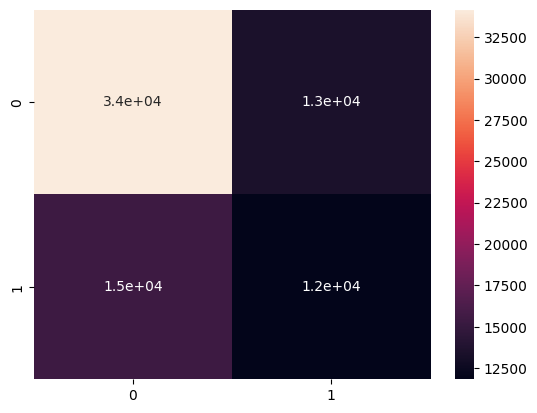

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, precision_recall_curve

# Créer un classifieur de forêt aléatoire
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# Entraîner le classifieur avec les données d'entraînement
clf.fit(X_train, y_train)

# Évaluer le classifieur avec les données de test
score = clf.score(X_test, y_test)

y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)

sns.heatmap(cm, annot=True)

<Axes: >

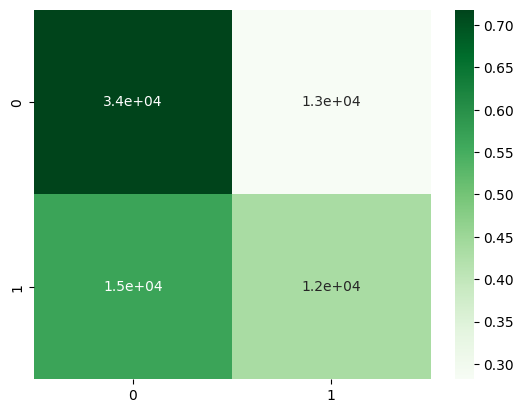

In [18]:
cm = confusion_matrix(y_test, y_pred)
normalized_conf_matrix = cm / np.sum(cm, axis=1, keepdims=True)
sns.heatmap(normalized_conf_matrix, annot=cm, cmap='Greens')

In [19]:
# Importance normalisée des 8 principales variables dans la prise de décision
feats_forest = {}
for feature, importance in zip(data.columns, clf.feature_importances_):
    feats_forest[feature] = importance

importances_forest = pd.DataFrame.from_dict(feats_forest, orient='index').rename(columns={0: 'Importance'})
importances_forest = importances_forest.sort_values(by='Importance', ascending=False)
display(importances_forest.head(15))

,Importance
ecart,0.695397
objectif_usd,0.138148
objectif,0.102067
categorie_principale_Music,0.007667
categorie_principale_Theater,0.006442
categorie_principale_Technology,0.005614
categorie_principale_Fashion,0.004253
categorie_principale_Comics,0.003517
categorie_principale_Publishing,0.002849
categorie_principale_Crafts,0.002830


In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.72      0.70     47567
           1       0.47      0.43      0.45     27232

    accuracy                           0.61     74799
   macro avg       0.58      0.58      0.58     74799
weighted avg       0.61      0.61      0.61     74799



KNN

[[35645 11922]
 [15736 11496]]


<Axes: >

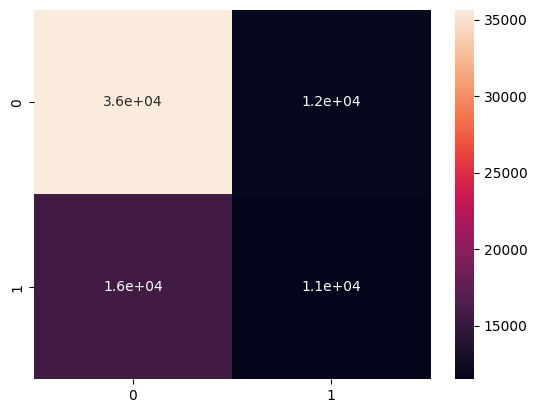

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# Initialiser le classificateur k-nn
knn = KNeighborsClassifier(n_neighbors=10, weights='distance')

# Entraîner le classificateur avec les données d'entraînement
knn.fit(X_train, y_train)

# Prédire les classes pour les données de test
y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)

sns.heatmap(cm, annot=True)

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.75      0.72     47567
           1       0.49      0.42      0.45     27232

    accuracy                           0.63     74799
   macro avg       0.59      0.59      0.59     74799
weighted avg       0.62      0.63      0.62     74799



[[40196  7371]
 [18715  8517]]


<Axes: >

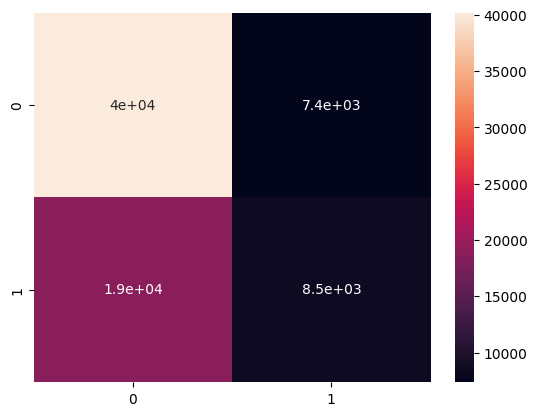

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# Initialiser le classificateur k-nn
knn = KNeighborsClassifier(n_neighbors=10)

# Entraîner le classificateur avec les données d'entraînement
knn.fit(X_train, y_train)

# Prédire les classes pour les données de test
y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)

sns.heatmap(cm, annot=True)

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.85      0.76     47567
           1       0.54      0.31      0.40     27232

    accuracy                           0.65     74799
   macro avg       0.61      0.58      0.58     74799
weighted avg       0.63      0.65      0.62     74799



[[38384  9183]
 [16762 10470]]


<Axes: >

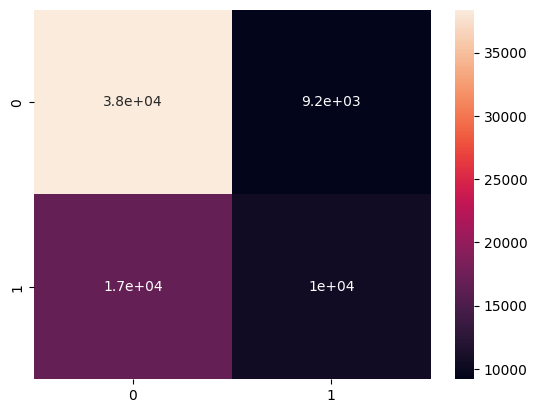

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# Initialiser le classificateur k-nn
knn = KNeighborsClassifier(n_neighbors=15)

# Entraîner le classificateur avec les données d'entraînement
knn.fit(X_train, y_train)

# Prédire les classes pour les données de test
y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)

sns.heatmap(cm, annot=True)

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.81      0.75     47567
           1       0.53      0.38      0.45     27232

    accuracy                           0.65     74799
   macro avg       0.61      0.60      0.60     74799
weighted avg       0.64      0.65      0.64     74799

